# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

## Import Independences

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
df = pd.read_csv("./customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [5]:
df.shape

(50000, 14)

## EDA

### Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [6]:
#show summary statistic for numerical values
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_passengers,50000.0,1.591240,1.020165,1.00,1.00,1.00,2.00,9.0
purchase_lead,50000.0,84.940480,90.451378,0.00,21.00,51.00,115.00,867.0
length_of_stay,50000.0,23.044560,33.887670,0.00,5.00,17.00,28.00,778.0
flight_hour,50000.0,9.066340,5.412660,0.00,5.00,9.00,13.00,23.0
wants_extra_baggage,50000.0,0.668780,0.470657,0.00,0.00,1.00,1.00,1.0
wants_preferred_seat,50000.0,0.296960,0.456923,0.00,0.00,0.00,1.00,1.0
wants_in_flight_meals,50000.0,0.427140,0.494668,0.00,0.00,0.00,1.00,1.0
flight_duration,50000.0,7.277561,1.496863,4.67,5.62,7.57,8.83,9.5
booking_complete,50000.0,0.149560,0.356643,0.00,0.00,0.00,0.00,1.0


In [16]:
#show summary statistic for non numerical values
df.describe(include='object').T

,count,unique,top,freq
sales_channel,50000,2,Internet,44382
trip_type,50000,3,RoundTrip,49497
flight_day,50000,7,Mon,8102
route,50000,799,AKLKUL,2680
booking_origin,50000,104,Australia,17872


In [7]:
#show unique values in num_passengers columns
df['num_passengers'].unique()

array([2, 1, 3, 4, 6, 5, 7, 9, 8], dtype=int64)

In [8]:
#show unique values in sales_channel columns
df['sales_channel'].unique()

array(['Internet', 'Mobile'], dtype=object)

In [9]:
#show unique values in trip_type columns
df['trip_type'].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [12]:
#show unique values in flight_day columns
df['flight_day'].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [17]:
#show number of unique values in route columns
df['route'].nunique()

799

In [18]:
#show number of unique values in booking_origin columns
df['booking_origin'].nunique()

104

In [20]:
#show wants_extra_baggage values columns
df['wants_extra_baggage'].value_counts()

wants_extra_baggage
1    33439
0    16561
Name: count, dtype: int64

In [21]:
#show wants_preferred_seat values columns
df['wants_preferred_seat'].value_counts()

wants_preferred_seat
0    35152
1    14848
Name: count, dtype: int64

In [22]:
#show wants_extra_baggage values columns
df['wants_in_flight_meals'].value_counts()

wants_in_flight_meals
0    28643
1    21357
Name: count, dtype: int64

In [23]:
#show booking_complete values columns
df['booking_complete'].value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

### Data Visualization

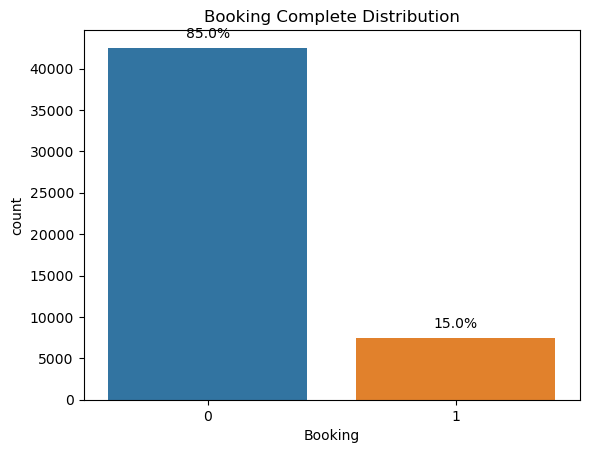

In [27]:
# booking_complete distribution
ax = sns.countplot(data=df, x='booking_complete')
plt.title('Booking Complete Distribution')
plt.xlabel('Booking')

# Add percentages on top of the bars
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() /50000)
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

# Show the plot
plt.show()

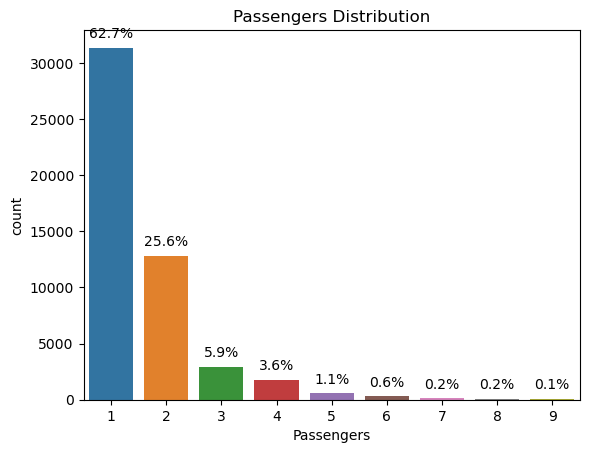

In [29]:
# num_passengers distribution
ax = sns.countplot(data=df, x='num_passengers')
plt.title('Passengers Distribution')
plt.xlabel('Passengers')

# Add percentages on top of the bars
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() /50000)
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

# Show the plot
plt.show()

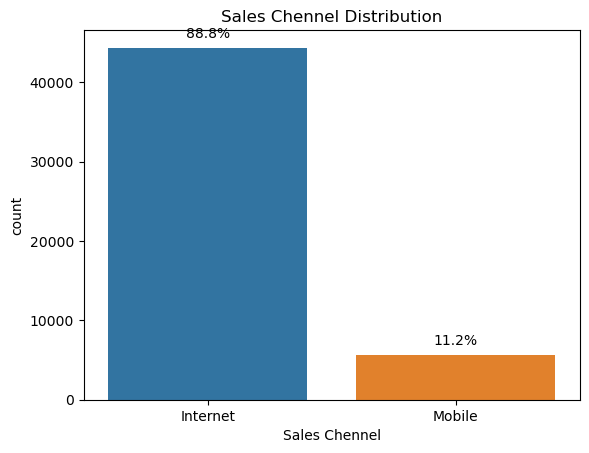

In [30]:
# sales_channel distribution
ax = sns.countplot(data=df, x='sales_channel')
plt.title('Sales Chennel Distribution')
plt.xlabel('Sales Chennel')

# Add percentages on top of the bars
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() /50000)
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

# Show the plot
plt.show()

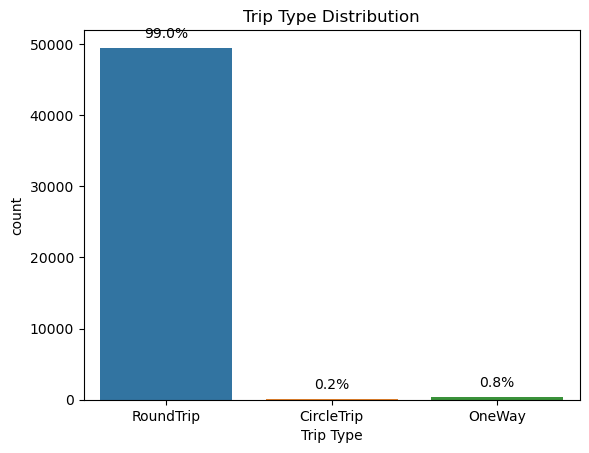

In [32]:
# trip_type distribution
ax = sns.countplot(data=df, x='trip_type')
plt.title('Trip Type Distribution')
plt.xlabel('Trip Type')

# Add percentages on top of the bars
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() /50000)
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

# Show the plot
plt.show()

C:\Users\Eng.M\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


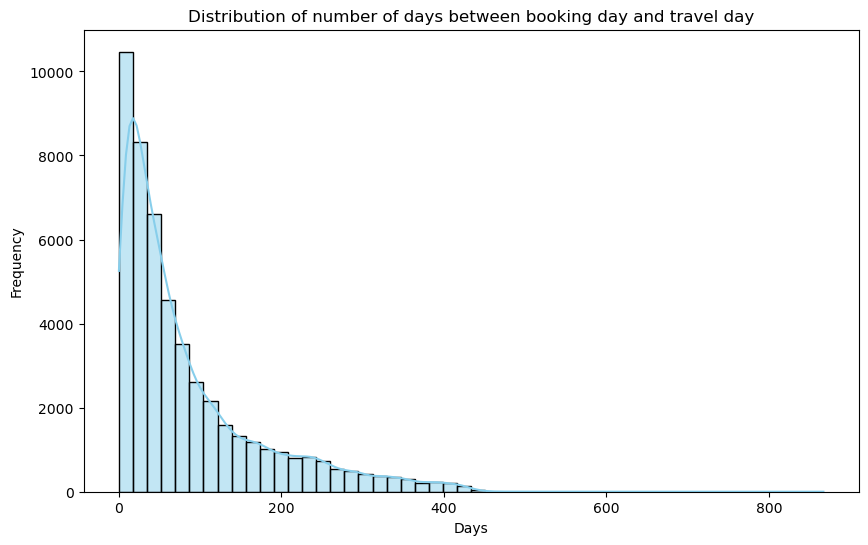

In [41]:
# distribution of number of days between booking day and travel day
#Creating the histogram
plt.figure(figsize=(10, 6))  # Setting the figure size for better visibility
sns.histplot(data=df, x='purchase_lead', bins=50, kde=True, color='skyblue')

# Adding title and labels
plt.title('Distribution of number of days between booking day and travel day')
plt.xlabel('Days')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

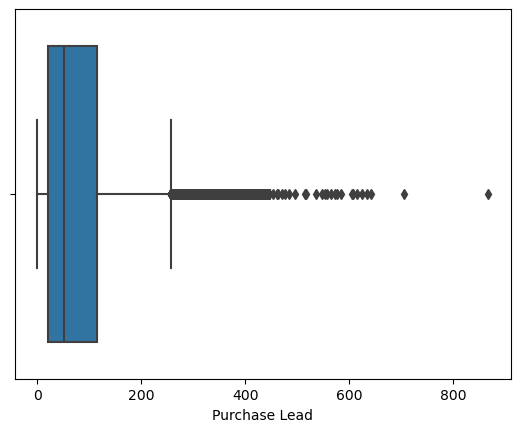

In [11]:
# check outliers for purchase_lead
sns.boxplot(data=df, x='purchase_lead')
plt.xlabel('Purchase Lead');

Q1 = df['purchase_lead'].quantile(0.25)
Q3 = df['purchase_lead'].quantile(0.75)
IQR = Q3 - Q1

In [12]:
# Calculate the boundaries for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['purchase_lead'] < lower_bound) | (df['purchase_lead'] > upper_bound)]

# Calculate the percentage of outliers
percentage_outliers = (len(outliers) / len(df)) * 100

print(f'IQR: {IQR}')
print(f'Lower Bound: {lower_bound}')
print(f'Upper Bound: {upper_bound}')
print(f'Number of outliers: {len(outliers)}')
print(f'Percentage of outliers: {percentage_outliers:.2f}%')

IQR: 94.0
Lower Bound: -120.0
Upper Bound: 256.0
Number of outliers: 3456
Percentage of outliers: 6.91%


C:\Users\Eng.M\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


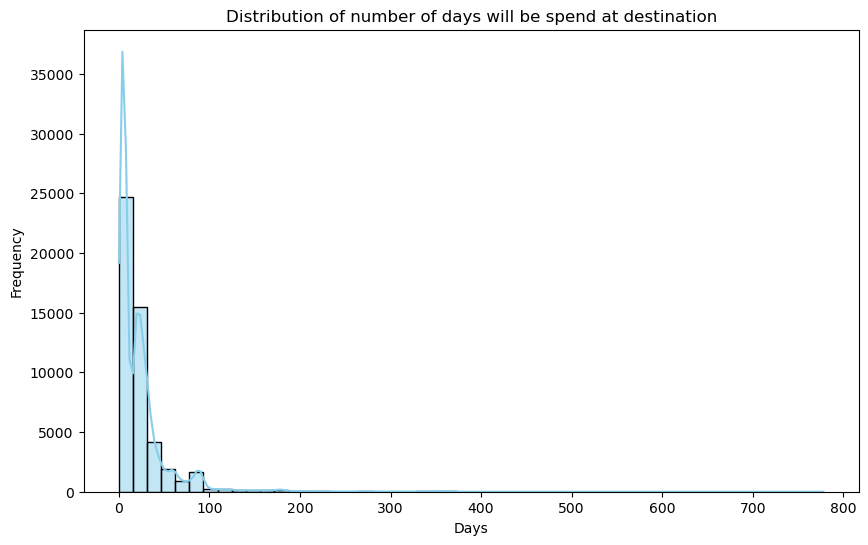

In [7]:
# distribution of number of days will be spend at destination
plt.figure(figsize=(10, 6))  # Setting the figure size for better visibility
sns.histplot(data=df, x='length_of_stay', bins=50, kde=True, color='skyblue')

# Adding title and labels
plt.title('Distribution of number of days will be spend at destination')
plt.xlabel('Days')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

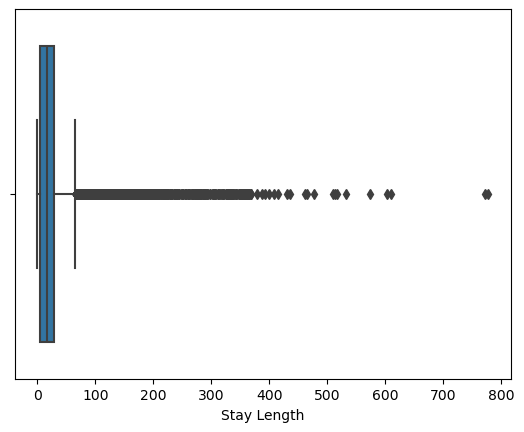

In [19]:
# check outliers for length_of_stay
sns.boxplot(data=df, x='length_of_stay')
plt.xlabel('Stay Length');

Q1 = df['length_of_stay'].quantile(0.25)
Q3 = df['length_of_stay'].quantile(0.75)
IQR = Q3 - Q1

In [20]:
# Calculate the boundaries for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['length_of_stay'] < lower_bound) | (df['length_of_stay'] > upper_bound)]

# Calculate the percentage of outliers
percentage_outliers = (len(outliers) / len(df)) * 100

print(f'IQR: {IQR}')
print(f'Lower Bound: {lower_bound}')
print(f'Upper Bound: {upper_bound}')
print(f'Number of outliers: {len(outliers)}')
print(f'Percentage of outliers: {percentage_outliers:.2f}%')

IQR: 24.0
Lower Bound: -31.0
Upper Bound: 65.0
Number of outliers: 3442
Percentage of outliers: 7.40%


C:\Users\Eng.M\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


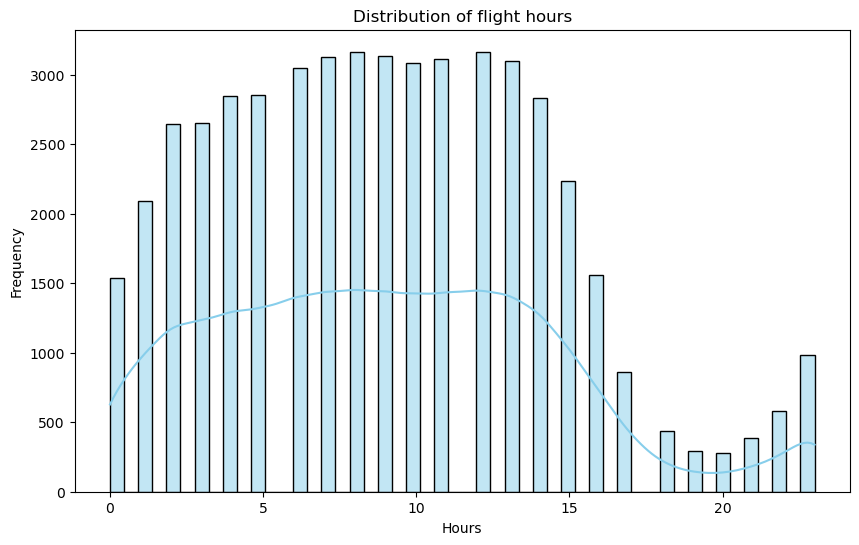

In [10]:
# distribution of flight hours
plt.figure(figsize=(10, 6))  # Setting the figure size for better visibility
sns.histplot(data=df, x='flight_hour', bins=50, kde=True, color='skyblue')

# Adding title and labels
plt.title('Distribution of flight hours')
plt.xlabel('Hours')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

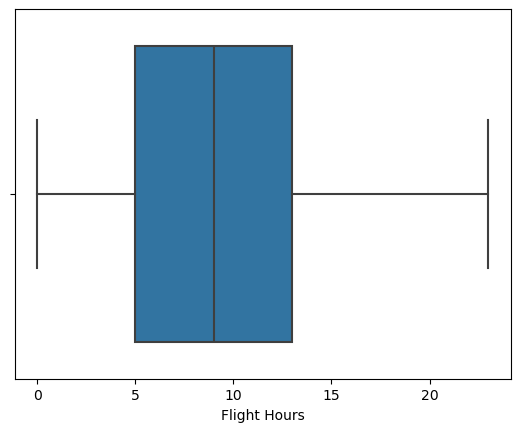

In [12]:
# check outliers for flight hours
sns.boxplot(data=df, x='flight_hour')
plt.xlabel('Flight Hours');

Q1 = df['flight_hour'].quantile(0.25)
Q3 = df['flight_hour'].quantile(0.75)
IQR = Q3 - Q1

In [13]:
# Calculate the boundaries for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['flight_hour'] < lower_bound) | (df['flight_hour'] > upper_bound)]

# Calculate the percentage of outliers
percentage_outliers = (len(outliers) / len(df)) * 100

print(f'IQR: {IQR}')
print(f'Lower Bound: {lower_bound}')
print(f'Upper Bound: {upper_bound}')
print(f'Number of outliers: {len(outliers)}')
print(f'Percentage of outliers: {percentage_outliers:.2f}%')

IQR: 8.0
Lower Bound: -7.0
Upper Bound: 25.0
Number of outliers: 0
Percentage of outliers: 0.00%


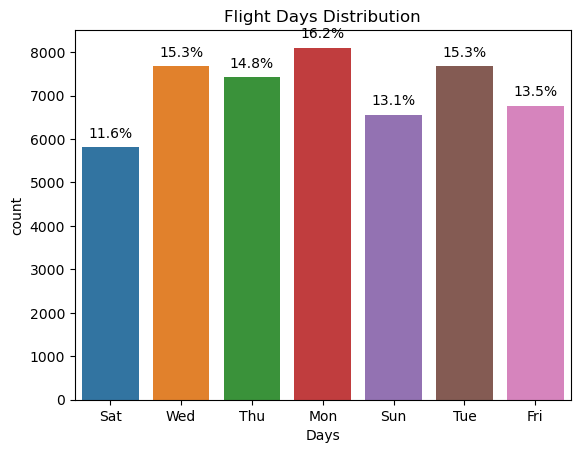

In [15]:
# flight_day distribution
ax = sns.countplot(data=df, x='flight_day')
plt.title('Flight Days Distribution')
plt.xlabel('Days')

# Add percentages on top of the bars
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() /50000)
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

# Show the plot
plt.show()

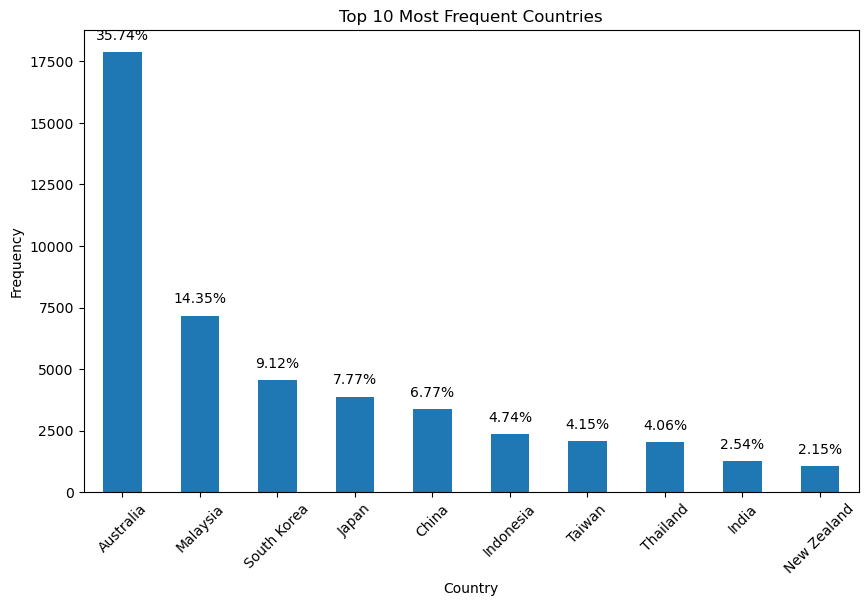

In [20]:
# Top 10 Most Frequent Countries
top_10_countries = df['booking_origin'].value_counts().head(10)

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = top_10_countries.plot(kind='bar', title='Top 10 Most Frequent Countries')

# Annotate bars with percentages
for i, count in enumerate(top_10_countries):
    percentage = ((top_10_countries / 50000) * 100).iloc[i]
    ax.text(i, count + 50000 * 0.01, f'{percentage:.2f}%', ha='center')

# Set labels
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

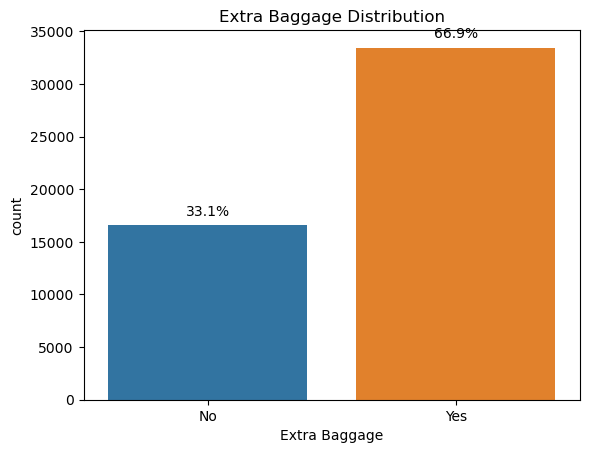

In [23]:
# wants_extra_baggage distribution
ax = sns.countplot(data=df, x='wants_extra_baggage')
plt.title('Extra Baggage Distribution')
plt.xlabel('Extra Baggage')
ax.set_xticklabels(['No', 'Yes'])

# Add percentages on top of the bars
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() /50000)
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

# Show the plot
plt.show()

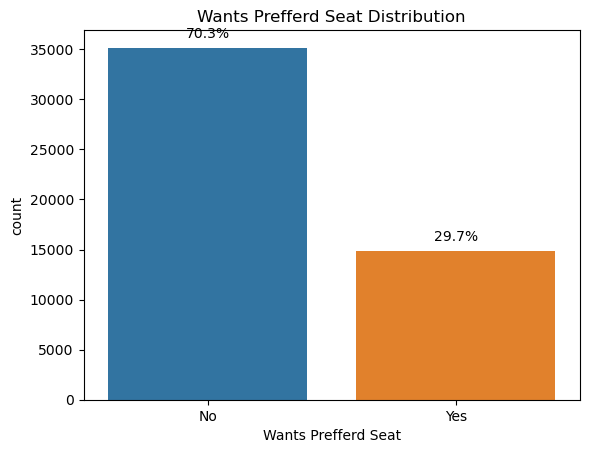

In [24]:
# wants_preferred_seat distribution
ax = sns.countplot(data=df, x='wants_preferred_seat')
plt.title('Wants Prefferd Seat Distribution')
plt.xlabel('Wants Prefferd Seat')
ax.set_xticklabels(['No', 'Yes'])

# Add percentages on top of the bars
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() /50000)
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

# Show the plot
plt.show()

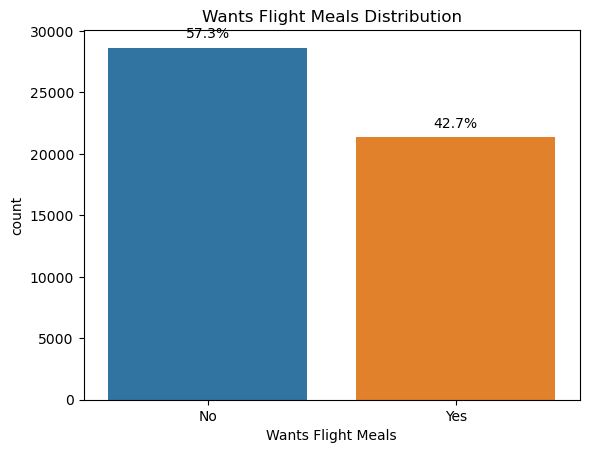

In [25]:
# wants_in_flight_meals distribution
ax = sns.countplot(data=df, x='wants_in_flight_meals')
plt.title('Wants Flight Meals Distribution')
plt.xlabel('Wants Flight Meals')
ax.set_xticklabels(['No', 'Yes'])

# Add percentages on top of the bars
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() /50000)
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

# Show the plot
plt.show()

C:\Users\Eng.M\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


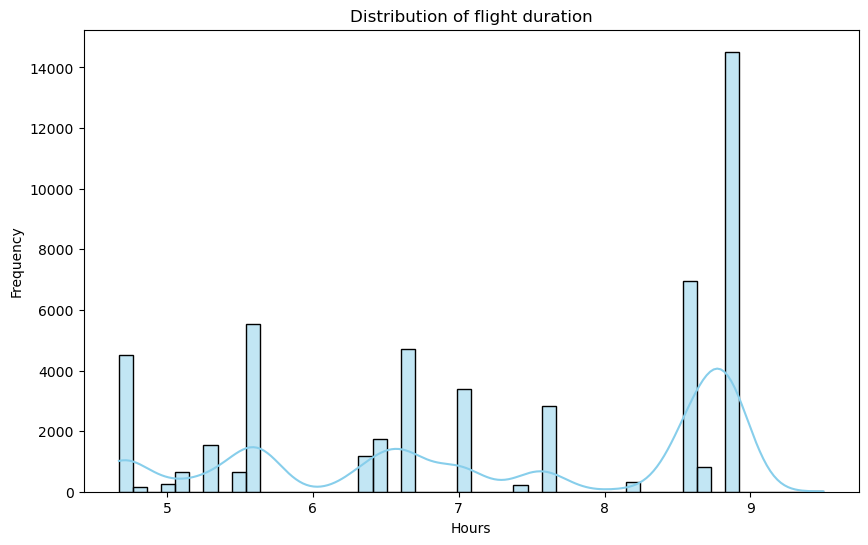

In [26]:
# distribution of flight duration
plt.figure(figsize=(10, 6))  # Setting the figure size for better visibility
sns.histplot(data=df, x='flight_duration', bins=50, kde=True, color='skyblue')

# Adding title and labels
plt.title('Distribution of flight duration')
plt.xlabel('Hours')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()

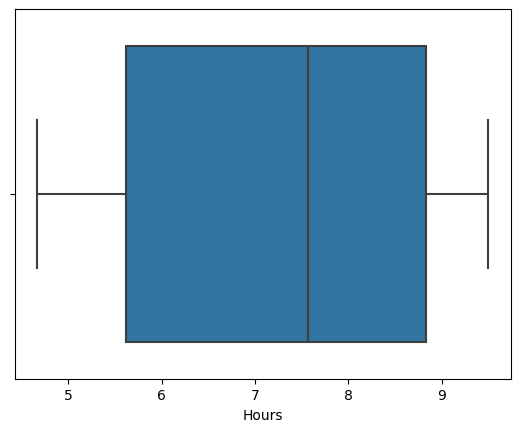

In [27]:
# check outliers for length_of_stay
sns.boxplot(data=df, x='flight_duration')
plt.xlabel('Hours');

Q1 = df['flight_duration'].quantile(0.25)
Q3 = df['flight_duration'].quantile(0.75)
IQR = Q3 - Q1

In [28]:
# Calculate the boundaries for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['flight_duration'] < lower_bound) | (df['flight_duration'] > upper_bound)]

# Calculate the percentage of outliers
percentage_outliers = (len(outliers) / len(df)) * 100

print(f'IQR: {IQR}')
print(f'Lower Bound: {lower_bound}')
print(f'Upper Bound: {upper_bound}')
print(f'Number of outliers: {len(outliers)}')
print(f'Percentage of outliers: {percentage_outliers:.2f}%')

IQR: 3.21
Lower Bound: 0.8050000000000006
Upper Bound: 13.645
Number of outliers: 0
Percentage of outliers: 0.00%


## Data Preprocessing
u th_of_stay

### Columns Drop it 
- booking_origin
- route

In [3]:
# drop unusefull columns
df.drop(columns=['booking_origin', 'route'], inplace=True)

### Columns Convert From Categorical To Continous
- flight_day
- sales_channel
- trip_type make it binary and then convert it to 0/1 (1 for round trip, 0 for other)

In [4]:
df["flight_day"] = df["flight_day"].map({
    "Mon": 3,
    "Tue": 4,
    "Wed": 5,
    "Thu": 6,
    "Fri": 7,
    "Sat": 1,
    "Sun": 2,
})

In [6]:
df["sales_channel"].unique()

array(['Internet', 'Mobile'], dtype=object)

In [7]:
#convert 
df["sales_channel"] = df["sales_channel"].map( {
   'Internet':1,
    'Mobile':0
})

In [9]:
df["trip_type"] = df["trip_type"].map( {
   'RoundTrip':1,
    'OneWay':0,
    'CircleTrip':2
})

### drop outliers from
- purchase_lead
- length_of_stay

In [14]:
# drop outlier from column
df.drop(df[df['purchase_lead'] >(Q3 + (1.5 * IQR))].index, inplace=True)

In [21]:
# drop outlier from column
df.drop(df[df['length_of_stay'] >(Q3 + (1.5 * IQR))].index, inplace=True)

In [22]:
df.shape

(43102, 12)

In [23]:
df.dtypes

num_passengers             int64
sales_channel              int64
trip_type                  int64
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                 int64
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

### Data Normalization

In [25]:
df['purchase_lead'] = df['purchase_lead'] / max(df['purchase_lead']) 
df['flight_hour'] =df['flight_hour']  / max(df['flight_hour'] )

In [27]:
df['length_of_stay'] =df['length_of_stay']  / max(df['length_of_stay'] )

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_passengers,43102.0,1.577908,1.006900,1.00,1.000000,1.000000,2.000000,9.0
sales_channel,43102.0,0.883903,0.320345,0.00,1.000000,1.000000,1.000000,1.0
trip_type,43102.0,0.994177,0.100524,0.00,1.000000,1.000000,1.000000,2.0
purchase_lead,43102.0,0.266364,0.244838,0.00,0.078125,0.183594,0.382812,1.0
length_of_stay,43102.0,0.249905,0.224551,0.00,0.076923,0.092308,0.384615,1.0
flight_hour,43102.0,0.394256,0.233931,0.00,0.217391,0.391304,0.565217,1.0
flight_day,43102.0,4.122686,1.923909,1.00,3.000000,4.000000,6.000000,7.0
wants_extra_baggage,43102.0,0.658786,0.474123,0.00,0.000000,1.000000,1.000000,1.0
wants_preferred_seat,43102.0,0.295416,0.456235,0.00,0.000000,0.000000,1.000000,1.0
wants_in_flight_meals,43102.0,0.422718,0.493997,0.00,0.000000,0.000000,1.000000,1.0


In [29]:
corr = df.corr()
corr

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
num_passengers,1.000000,0.004017,0.001846,0.188626,-0.125158,0.012304,-0.019498,0.138330,0.037601,0.026471,-0.065997,0.028426
sales_channel,0.004017,1.000000,-0.010188,0.016486,0.078987,-0.021784,0.027742,0.046219,-0.037265,0.017048,0.040076,0.043370
trip_type,0.001846,-0.010188,1.000000,-0.002661,0.008542,-0.002830,0.002854,-0.002748,0.009687,0.008925,-0.029356,0.015993
purchase_lead,0.188626,0.016486,-0.002661,1.000000,0.031322,0.031265,-0.057762,0.034199,0.017653,0.020837,0.082844,-0.028016
length_of_stay,-0.125158,0.078987,0.008542,0.031322,1.000000,-0.038985,0.001466,0.240156,0.004172,0.103046,0.167297,-0.092030
flight_hour,0.012304,-0.021784,-0.002830,0.031265,-0.038985,1.000000,-0.015472,-0.008964,0.014155,0.012894,-0.007901,0.010885
flight_day,-0.019498,0.027742,0.002854,-0.057762,0.001466,-0.015472,1.000000,-0.003501,-0.015044,-0.001375,-0.014107,0.003917
wants_extra_baggage,0.138330,0.046219,-0.002748,0.034199,0.240156,-0.008964,-0.003501,1.000000,0.204294,0.205145,0.052986,0.066300
wants_preferred_seat,0.037601,-0.037265,0.009687,0.017653,0.004172,0.014155,-0.015044,0.204294,1.000000,0.314856,0.096946,0.053140
wants_in_flight_meals,0.026471,0.017048,0.008925,0.020837,0.103046,0.012894,-0.001375,0.205145,0.314856,1.000000,0.154192,0.025459


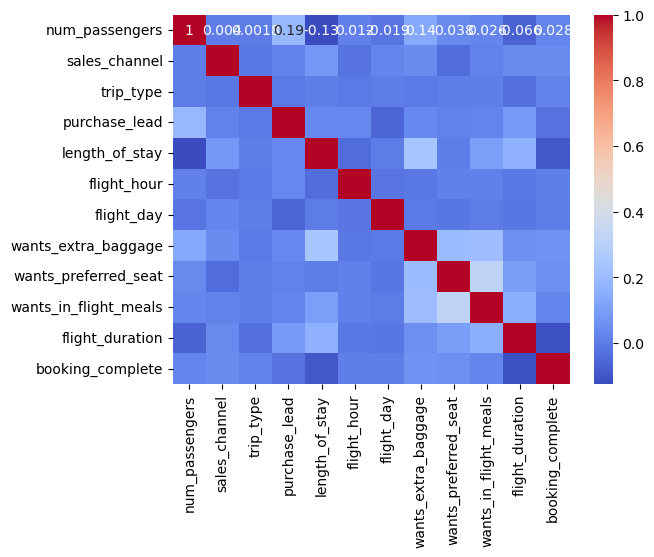

In [30]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

## Modeling

In [31]:
df.shape

(43102, 12)

In [43]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay,accuracy_score
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
# import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

### Spliting Data

In [45]:
X = df.drop(columns=['booking_complete']).values
y = df['booking_complete'].values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [60]:
feature_names = df.drop(columns=['booking_complete']).columns.tolist()
feature_names

['num_passengers',
 'sales_channel',
 'trip_type',
 'purchase_lead',
 'length_of_stay',
 'flight_hour',
 'flight_day',
 'wants_extra_baggage',
 'wants_preferred_seat',
 'wants_in_flight_meals',
 'flight_duration']

### Over Sampling Problem

In [46]:
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train, y_train)
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 36615, 1: 6487})
Counter({0: 36615, 1: 6487})


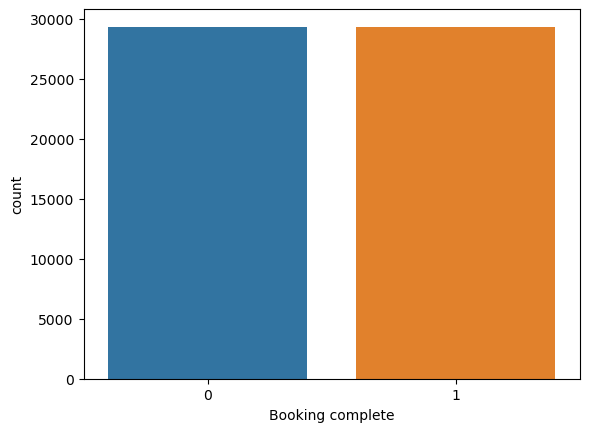

In [47]:
plt.xlabel('Booking complete')
sns.countplot(data=df, x=y_train);

### Model 

In [42]:
def confusionmatrix(predictions):
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    return disp.plot()
def eval_classification(model):
    
    #print(len(x_test), 'x_test')
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)

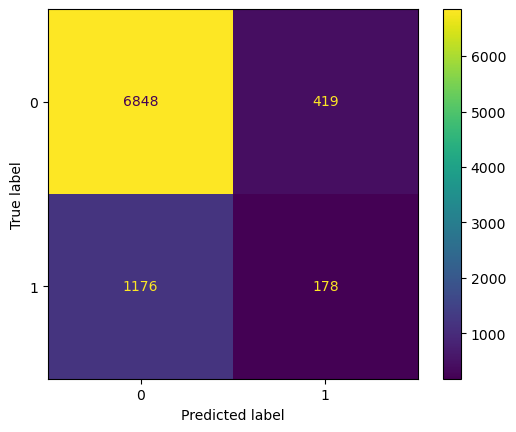

In [51]:
# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(x_train, y_train)

predictions = rf_model.predict(x_test)
confusionmatrix(predictions)

eval_classification(rf_model)

In [52]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.94      0.90      7267
           1       0.30      0.13      0.18      1354

    accuracy                           0.81      8621
   macro avg       0.58      0.54      0.54      8621
weighted avg       0.77      0.81      0.78      8621



In [53]:
accuracy_score(y_test, predictions)

0.8149866604802227

### Features Importance

In [61]:
import numpy as np
# Get feature importances
importances = rf_model.feature_importances_

# Get the indices of the sorted feature importances
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for i in range(len(feature_names)):
    print(f"{i + 1}. {feature_names[indices[i]]} ({importances[indices[i]]:.4f})")

Feature ranking:
1. length_of_stay (0.2757)
2. flight_hour (0.1721)
3. flight_duration (0.1697)
4. purchase_lead (0.1685)
5. flight_day (0.0784)
6. num_passengers (0.0415)
7. sales_channel (0.0265)
8. wants_extra_baggage (0.0244)
9. wants_in_flight_meals (0.0216)
10. wants_preferred_seat (0.0188)
11. trip_type (0.0030)


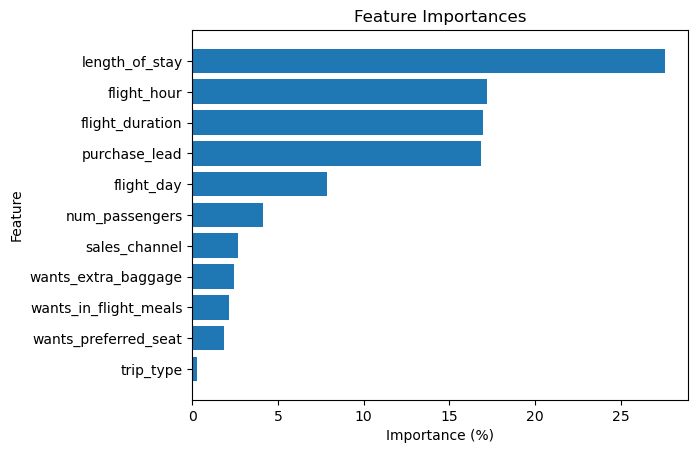

In [68]:
# Normalize importances to percentages
importances_percentage = 100.0 * (importances / np.sum(importances))

plt.figure()
plt.title("Feature Importances")
plt.barh(range(len(feature_names)), importances_percentage[indices], align='center')
plt.yticks(range(len(feature_names)), [feature_names[i] for i in indices])
plt.ylim([len(feature_names), -1])
plt.ylabel('Feature')
plt.xlabel('Importance (%)')
plt.show()